# Grid search using cross-validation

Adapted by <alberto.suarez@uam.es>

from
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

## The digits dataset

Adapted from code by

Code source: Gaël Varoquaux

Modified for documentation by Jaques Grobler

License: BSD 3 clause


https://scikit-learn.org/dev/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py


Sample of the digit 8


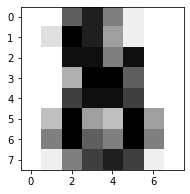

In [1]:
from sklearn import datasets

import matplotlib.pyplot as plt

# Load the digits dataset.
digits = datasets.load_digits()

# Display a digit.
n_digit = -1

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[n_digit], 
           cmap=plt.cm.gray_r, 
           interpolation='nearest')
print('Sample of the digit {}'.format(digits.target[n_digit]))
plt.show()

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# Selection of hyperparamters by grid search

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Comment to view warnings that indicate non-converged results
import warnings
warnings.filterwarnings('ignore')


# Loading a dataset
dataset = datasets.load_digits()

X = dataset.data
y = dataset.target

# Split the dataset in training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.2, 
                                                    random_state=0)

n_training_samples = len(X_train)

# Center and scale training and test data using training scaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Classifier type

classifier = MLPClassifier()

# Set the parameters by cross-validation

hidden_later_sizes = [[5], [10], [50], [5, 5], [7, 3], [30, 20]]

activation_functions = ['logistic', 'tanh', 'relu']

hyperparameters = [{'hidden_layer_sizes': hidden_later_sizes, 
                    'activation': activation_functions,
                    'solver': ['lbfgs', 'adam']},
                   {'hidden_layer_sizes': hidden_later_sizes, 
                    'activation': activation_functions,
                    'solver': ['sgd'],
                    'batch_size': [np.minimum(10, n_training_samples),
                                   np.minimum(100, n_training_samples), 
                                   'auto']}]

scorer = make_scorer(accuracy_score)
clf = GridSearchCV(classifier, 
                   hyperparameters,
                   scoring=scorer,
                   cv=5) # cv-fold stratified cross-validation

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'activation': ['logistic', 'tanh', 'relu'],
                          'hidden_layer_sizes': [[5], [10], [50], [5, 5],
                                                 [7, 3], [30, 20]],
                          'solver': ['lbfgs', 'adam']},
                         {'activation': ['logistic', 'tanh', 'relu'],
                          'batch_size': [10, 100, 'auto'],
                          'hidden_layer_sizes': [[5], [10], [50], [5, 5],
                                                 [7, 3], [30, 20]],
                          'solver': ['sgd']}],
             scoring=make_scorer(accuracy_score))

In [5]:
print("\n Cross validation scores: \n")

mean_scores = clf.cv_results_['mean_test_score']
std_scores = clf.cv_results_['std_test_score']

for mean_score, std_score, hyperparameters in zip(mean_scores, 
                                                  std_scores, 
                                                  clf.cv_results_['params']):
    print('{:0.3f} ({:0.03f}) for {}'.format(mean_score, 
                                             std_score, 
                                             hyperparameters))


 Cross validation scores: 

0.758 (0.054) for {'activation': 'logistic', 'hidden_layer_sizes': [5], 'solver': 'lbfgs'}
0.602 (0.076) for {'activation': 'logistic', 'hidden_layer_sizes': [5], 'solver': 'adam'}
0.841 (0.033) for {'activation': 'logistic', 'hidden_layer_sizes': [10], 'solver': 'lbfgs'}
0.769 (0.041) for {'activation': 'logistic', 'hidden_layer_sizes': [10], 'solver': 'adam'}
0.919 (0.032) for {'activation': 'logistic', 'hidden_layer_sizes': [50], 'solver': 'lbfgs'}
0.916 (0.012) for {'activation': 'logistic', 'hidden_layer_sizes': [50], 'solver': 'adam'}
0.677 (0.071) for {'activation': 'logistic', 'hidden_layer_sizes': [5, 5], 'solver': 'lbfgs'}
0.345 (0.063) for {'activation': 'logistic', 'hidden_layer_sizes': [5, 5], 'solver': 'adam'}
0.699 (0.072) for {'activation': 'logistic', 'hidden_layer_sizes': [7, 3], 'solver': 'lbfgs'}
0.306 (0.074) for {'activation': 'logistic', 'hidden_layer_sizes': [7, 3], 'solver': 'adam'}
0.830 (0.032) for {'activation': 'logistic', 'hidd

In [6]:
y_test_pred = clf.predict(X_test)

print('Best parameters set found on train set:\n', 
      clf.best_params_)


print()

best_cv_index = clf.best_index_

# best_cv_params = clf.cv_results_['params'][best_cv_index] # Same as clf.best_params_
best_cv_mean_score = clf.cv_results_['mean_test_score'][best_cv_index]
best_cv_std_score = clf.cv_results_['std_test_score'][best_cv_index]

print('CV mean accuracy (stdev) = {:.2f} % ({:.2f} %)'.format(100.0*best_cv_mean_score, 
                                                              100.0*best_cv_std_score))

print()
print('Test accuracy = {:.2f} %'.format(100.0*accuracy_score(y_test, y_test_pred)))
print()
print('Detailed classification report:\n')
print(classification_report(y_test, y_test_pred))


Best parameters set found on train set:
 {'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': [50], 'solver': 'sgd'}

CV mean accuracy (stdev) = 94.99 % (1.40 %)

Test accuracy = 93.53 %

Detailed classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.95      0.95      0.95       147
           2       0.97      0.96      0.97       138
           3       0.94      0.90      0.92       150
           4       0.96      0.95      0.96       137
           5       0.94      0.90      0.92       153
           6       0.97      0.99      0.98       141
           7       0.89      0.98      0.93       140
           8       0.88      0.82      0.85       146
           9       0.87      0.94      0.90       139

    accuracy                           0.94      1438
   macro avg       0.94      0.94      0.94      1438
weighted avg       0.94      0.94      0.94      1438

